In [1]:
import os
import sys
import warnings

import numpy as np

import pandas as pd
import statsmodels.formula.api as smf
from IPython.core.display import HTML
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Data Cleaning 

In [2]:
df = pd.read_csv('munich_raw.csv')
print(df.shape)   
df.head()  

(8274, 79)


C:\Users\dcccddtcccccccc\AppData\Local\Temp\ipykernel_12608\3731344395.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('munich_raw.csv')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,97945,https://www.airbnb.com/rooms/97945,20250927041758,2025-09-27,city scrape,Deluxw-Apartm. with roof terrace,NaN,We are living in a outskirt of Munich its call...,https://a0.muscache.com/pictures/2459996/10b4c...,517685,...,4.93,4.78,4.73,NaN,f,2,2,0,0,0.74
1,114695,https://www.airbnb.com/rooms/114695,20250927041758,2025-09-27,previous scrape,Apartment Munich/East with sundeck,NaN,NaN,https://a0.muscache.com/pictures/21571874/960e...,581737,...,5.00,4.65,4.60,NaN,f,3,3,0,0,0.47
2,127383,https://www.airbnb.com/rooms/127383,20250927041758,2025-09-27,city scrape,City apartment next to Pinakothek,NaN,NaN,https://a0.muscache.com/pictures/79238c11-bc61...,630556,...,4.96,4.92,4.79,NaN,f,1,1,0,0,0.68
3,159634,https://www.airbnb.com/rooms/159634,20250927041758,2025-09-27,previous scrape,"Fancy, bright central roof top flat and homeof...",In this idyllic stylish flat you live very qui...,"Very quiet, green, squirrels and beergardens a...",https://a0.muscache.com/pictures/336144dc-b06d...,765694,...,4.80,4.61,4.46,NaN,t,1,1,0,0,0.27
4,170154,https://www.airbnb.com/rooms/170154,20250927041758,2025-09-27,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",NaN,https://a0.muscache.com/pictures/31636890/593e...,108297,...,4.98,4.78,4.91,NaN,f,1,0,1,0,3.46


In [3]:
df = df.drop(columns=["id", "listing_url", "scrape_id", "last_scraped", "picture_url",
                      "host_picture_url", "host_url", "host_name", "calendar_last_scraped", "host_thumbnail_url"])
print(df.shape)      


(8274, 69)


In [4]:
# Drop rows where 'price' is NaN
df = df.dropna(subset=['price'])
print(df.shape)

(5603, 69)


In [5]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


calendar_updated                5603
neighbourhood_group_cleansed    5603
license                         5572
host_neighbourhood              4494
neighborhood_overview           4078
neighbourhood                   4078
host_about                      3524
host_location                   1476
review_scores_checkin           1395
review_scores_accuracy          1395
first_review                    1395
review_scores_value             1395
reviews_per_month               1395
review_scores_cleanliness       1395
review_scores_rating            1395
last_review                     1395
review_scores_location          1395
review_scores_communication     1395
host_response_time               659
host_response_rate               659
host_acceptance_rate             349
description                      231
has_availability                 163
host_is_superhost                 50
bedrooms                           8
bathrooms                          4
bathrooms_text                     4
h

In [6]:
df = df.drop(columns=["calendar_updated", "neighbourhood_group_cleansed", "license","host_neighbourhood", "host_about", 
                      "neighborhood_overview", "neighbourhood", "host_location"])
print(df.shape)      


(5603, 61)


In [7]:
df["price"] = (
    df["price"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .astype(float)
)


In [8]:
df["price"].describe()

count     5603.000000
mean       263.736034
std        433.757852
min         15.000000
25%        112.000000
50%        179.000000
75%        300.000000
max      11303.000000
Name: price, dtype: float64

In [9]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


review_scores_cleanliness      1395
review_scores_checkin          1395
review_scores_communication    1395
review_scores_location         1395
reviews_per_month              1395
review_scores_value            1395
review_scores_rating           1395
review_scores_accuracy         1395
last_review                    1395
first_review                   1395
host_response_rate              659
host_response_time              659
host_acceptance_rate            349
description                     231
has_availability                163
host_is_superhost                50
bedrooms                          8
bathrooms_text                    4
bathrooms                         4
host_since                        3
host_listings_count               3
host_has_profile_pic              3
host_identity_verified            3
host_total_listings_count         3
host_verifications                3
minimum_minimum_nights            3
minimum_maximum_nights            3
maximum_maximum_nights      

In [10]:
cols_with_missing = [
    "has_availability",
    "beds",
    "bedrooms",
    "host_has_profile_pic",
    "host_verifications",
    "host_total_listings_count",
    "host_listings_count",
    "host_since",
    "host_identity_verified",
    "bathrooms",
    "bathrooms_text"
]

df = df.dropna(subset=cols_with_missing)
print(df.shape) 

(5424, 61)


In [11]:
# Handle missing values in review and host features
# 1. Reviews - create flag FIRST
df['has_reviews'] = df['review_scores_rating'].notna().astype(int)

# 2. Fill review scores with median OF EXISTING REVIEWS
review_cols = ['review_scores_rating', 'review_scores_accuracy', 
               'review_scores_cleanliness', 'review_scores_checkin',
               'review_scores_communication', 'review_scores_location', 
               'review_scores_value']

for col in review_cols:
    median_score = df[df[col].notna()][col].median()
    df[col] = df[col].fillna(median_score)

# 3. Reviews per month = 0 for no reviews
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 4. Host features - median
df["host_response_rate"] = (
    df["host_response_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)

df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())
df["host_acceptance_rate"] = (
    df["host_acceptance_rate"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .pipe(pd.to_numeric, errors="coerce")
)
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())

In [12]:
df.isna().sum().loc[lambda x: x > 0].sort_values(ascending=False)


first_review              1229
last_review               1229
host_response_time         589
description                140
host_is_superhost           50
maximum_minimum_nights       3
minimum_minimum_nights       3
maximum_maximum_nights       3
minimum_maximum_nights       3
dtype: int64

In [13]:
df["host_response_time"].value_counts(dropna=False)


host_response_time
within an hour        2350
within a few hours    1170
within a day           855
NaN                    589
a few days or more     460
Name: count, dtype: int64

In [14]:
host_response_dummies = pd.get_dummies(
    df["host_response_time"],
    prefix="host_response_time"
)

df = pd.concat([df, host_response_dummies], axis=1)
for col in host_response_dummies.columns:
    df[col] = df[col].astype(int)


In [15]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)


In [16]:
df["host_is_superhost"] = df["host_is_superhost"].fillna("f")
df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})


In [17]:
df["first_review"] = pd.to_datetime(df["first_review"], errors="coerce")
df["last_review"] = pd.to_datetime(df["last_review"], errors="coerce")


In [18]:
reference_date = df["last_review"].max()


In [19]:
df["days_since_first_review"] = (reference_date - df["first_review"]).dt.days
df["days_since_last_review"] = (reference_date - df["last_review"]).dt.days


In [20]:
max_days = df["days_since_first_review"].max()

df["days_since_first_review"] = df["days_since_first_review"].fillna(max_days + 1)
df["days_since_last_review"] = df["days_since_last_review"].fillna(max_days + 1)

In [21]:
df = df.drop(columns=["first_review", "last_review"])
df.head() 


,source,name,description,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,host_response_time_a_few_days_plus,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,days_since_first_review,days_since_last_review
0,city scrape,Deluxw-Apartm. with roof terrace,NaN,517685,2011-04-18,NaN,100.0,0.0,0,2.0,...,0,0,0.74,1,0,0,0,0,5108.0,2186.0
2,city scrape,City apartment next to Pinakothek,NaN,630556,2011-05-26,within a few hours,100.0,83.0,1,2.0,...,0,0,0.68,1,0,0,1,0,5229.0,75.0
4,city scrape,"Own floor & bath, parking & breakfast","Enjoy a quiet neighbourhood, easy access to th...",108297,2010-04-14,within a few hours,100.0,100.0,1,1.0,...,1,0,3.46,1,0,0,1,0,5116.0,5.0
6,city scrape,Beautiful room close to centre,NaN,825767,2011-07-16,within a day,80.0,73.0,0,1.0,...,1,0,0.74,1,0,1,0,0,4876.0,62.0
7,city scrape,Charming apartment near City Center,My apartment is located in the heart of Munich...,901209,2011-08-01,NaN,100.0,100.0,0,2.0,...,1,0,0.31,1,0,0,0,0,5115.0,167.0


## Features Extraction

In [22]:
# Amenity feature engineering
import unicodedata
import re

# 1) Clean and normalize the amenities column
#    - Convert to string
#    - Normalize unicode (e.g. \u2019 → ')
#    - Lowercase everything
#    - Remove brackets and quotes
#    - Replace separators with spaces
df["amenities_clean"] = (
    df["amenities"]
        .fillna("")
        .astype(str)
        .apply(lambda x: unicodedata.normalize("NFKD", x))
        .str.lower()
        .str.replace(r"[\[\]\{\}\"]", "", regex=True)  # remove brackets & quotes
        .str.replace(r"[_/]", " ", regex=True)        # normalize separators
)

# 2) Define robust regex patterns for amenities
#    - Patterns are flexible to wording variations
amenity_patterns = {
    "kitchen": r"\bkitchen\b",
    "hair_dryer": r"hair\s*dryer",
    "hot_water": r"hot\s*water",
    "wifi": r"wi[\s\-]?fi|internet|ethernet",
    "fast_wifi": r"fast\s*wi[\s\-]?fi",
    "iron": r"\biron\b",
    "heating": r"heating|radiant\s*heating|central\s*air",
    "washer": r"washer|washing\s*machine",
    "dryer": r"dryer",
    "refrigerator": r"refrigerator|fridge",
    "freezer": r"\bfreezer\b",
    "oven": r"\boven\b|baking\s*sheet",
    "stove": r"stove|cooktop|induction\s*stove",
    "microwave": r"microwave",
    "dishwasher": r"dishwasher",
    "coffee": r"coffee|coffee\s*maker|nespresso|espresso|pour[-\s]?over",
    "kettle": r"kettle",
    "tv": r"\btv\b|television|hdtv",
    "wine_glasses": r"wine\s*glasses?",
    "bathtub": r"bathtub|bath\s*tub",
    "shampoo": r"shampoo",
    "conditioner": r"conditioner",
    "soap": r"soap|shower\s*gel|body\s*soap",
    "cleaning_products": r"cleaning\s*products?",
    "first_aid_kit": r"first\s*aid",
    "smoke_alarm": r"smoke\s*alarm",
    "carbon_monoxide_alarm": r"carbon\s*monoxide",
    "fire_extinguisher": r"fire\s*extinguisher",
    "balcony": r"balcony",
    "workspace": r"workspace|desk",
    "books": r"books?|reading\s*material",
    "board_games": r"board\s*games?",
    "elevator": r"elevator|lift",
    "parking": r"parking",
    "self_checkin": r"self[\s\-]?check[\s\-]?in|lockbox",
    "pets_allowed": r"pets?\s*allowed",
    "security": r"security|safe",
    "dining_table": r"dining\s*table",
    "outdoor_dining": r"outdoor\s*dining",
    "toaster": r"toaster",
    "netflix": r"netflix",
}

# 3) Create amenity dummy variables
#    - 1 if amenity is present, 0 otherwise
for amenity, pattern in amenity_patterns.items():
    df[f"amenity_{amenity}"] = (
        df["amenities_clean"]
        .str.contains(pattern, regex=True)
        .astype(int)
    )

# 4) (Optional but useful) Overall amenity richness score
amenity_cols = [c for c in df.columns if c.startswith("amenity_")]
df["amenities_score"] = df[amenity_cols].sum(axis=1)


In [23]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['days_since_hosting'] = (reference_date - df['host_since']).dt.days

In [24]:
df["host_has_profile_pic"] = df["host_has_profile_pic"].map({"t": 1, "f": 0})
df["host_identity_verified"] = df["host_identity_verified"].map({"t": 1, "f": 0})
df['has_availability'] = df['has_availability'].map({'t': 1, 'f': 0})
df['instant_bookable'] = df['instant_bookable'].map({'t': 1, 'f': 0})


In [25]:
categorical_cols = [
    "room_type",
    "property_type",
    "neighbourhood_cleansed",
    "host_verifications"
]

for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis=1) 


In [26]:
VIENNA_CENTER_LAT = 48.208174
VIENNA_CENTER_LON = 16.373819
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c
df['distance_to_center'] = haversine(
    df['latitude'], df['longitude'], VIENNA_CENTER_LAT, VIENNA_CENTER_LON
)

In [27]:
# Drop price outliers
df = df[df['price'] <= 1000]

In [28]:
df.columns = df.columns.str.replace("/", "", regex=False)

In [29]:
df.columns = (
    df.columns
      .str.normalize("NFKD")          # normalize unicode
      .str.encode("ascii", "ignore")  # drop non-ascii chars
      .str.decode("utf-8")
      .str.replace(r"[^0-9a-zA-Z_]", "_", regex=True)
)

## Data Visualization

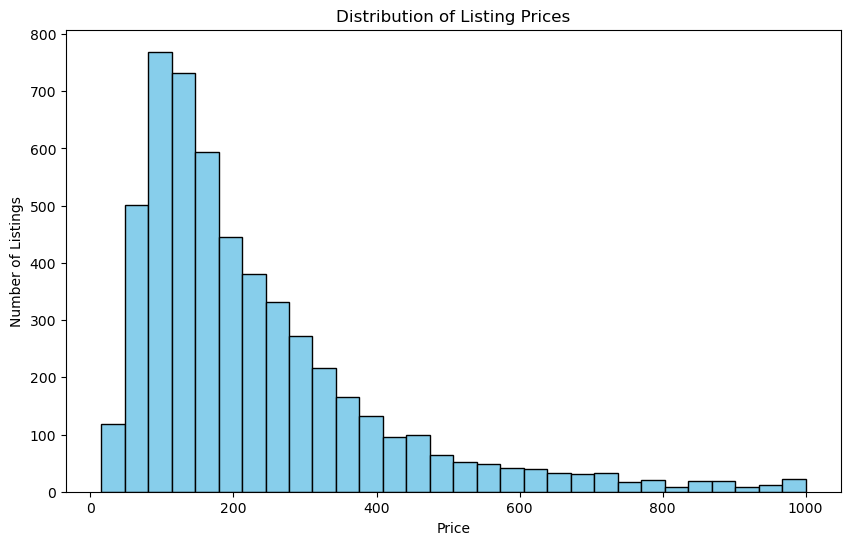

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

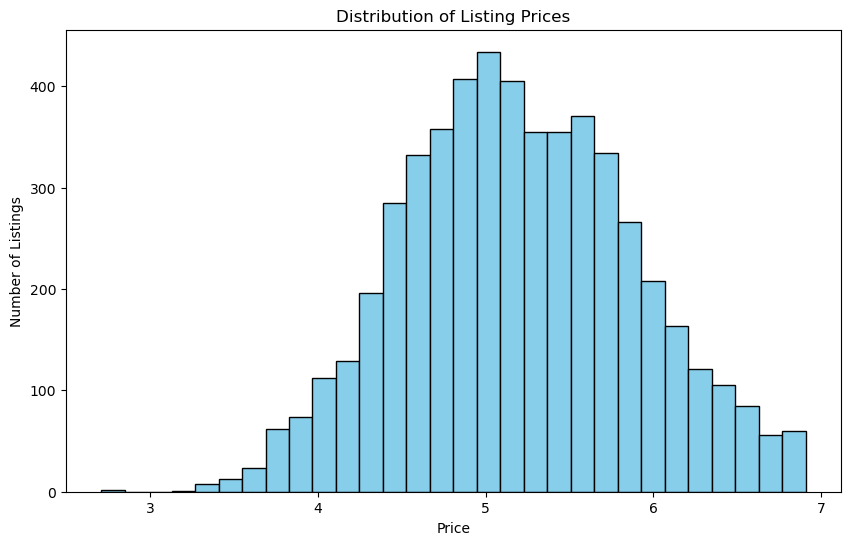

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(np.log(df["price"]), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Listing Prices")
plt.xlabel("Price")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Price Distribution by Room Type')

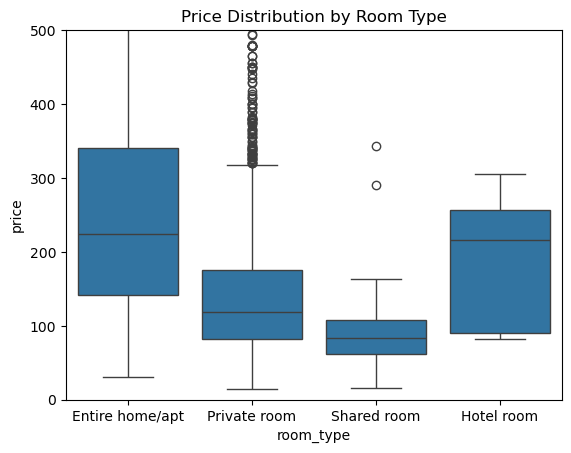

In [32]:
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 500)
plt.title("Price Distribution by Room Type")

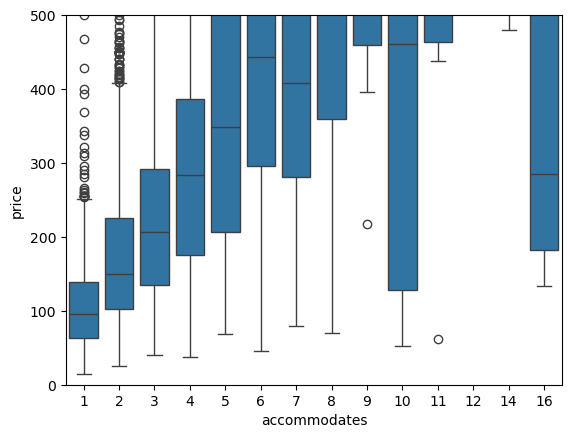

In [33]:
sns.boxplot(data = df, x = 'accommodates', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

Text(0.5, 1.0, 'Number of Listings by Neighborhood')

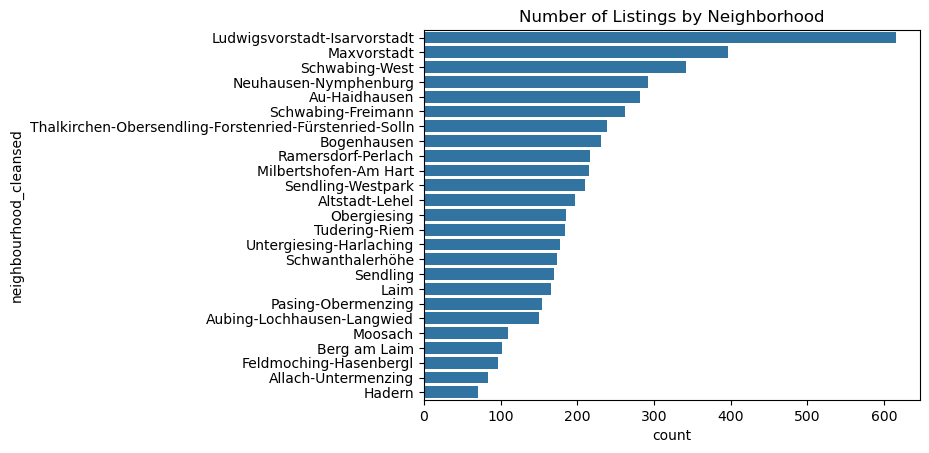

In [34]:
sns.countplot(y='neighbourhood_cleansed', data=df, order=df['neighbourhood_cleansed'].value_counts().index)
plt.title("Number of Listings by Neighborhood")

Text(0.5, 1.0, 'Host Response Time Distribution')

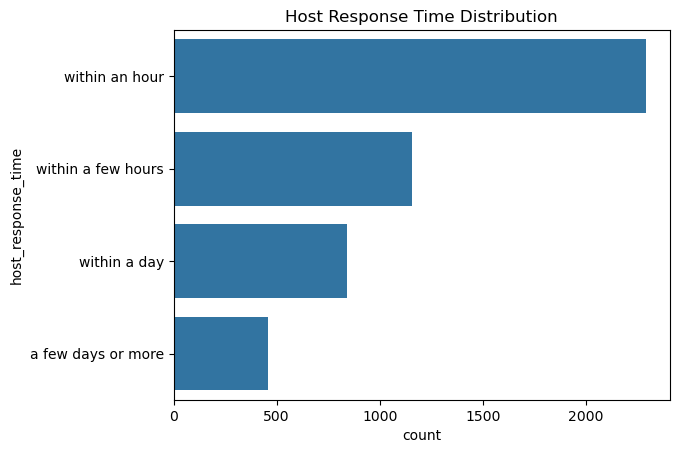

In [35]:
sns.countplot(y='host_response_time', data=df, order=df['host_response_time'].value_counts().index)
plt.title("Host Response Time Distribution")

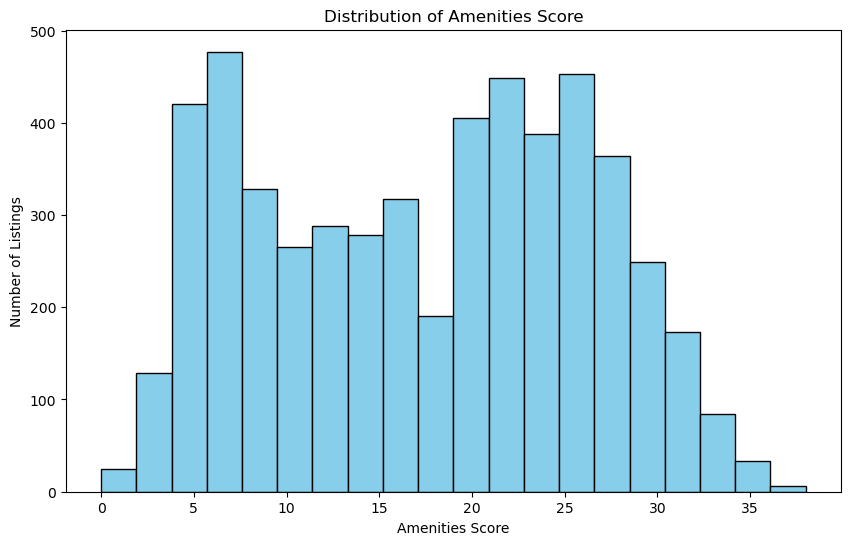

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df["amenities_score"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Amenities Score")
plt.xlabel("Amenities Score")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 1.0, 'Host Verifications')

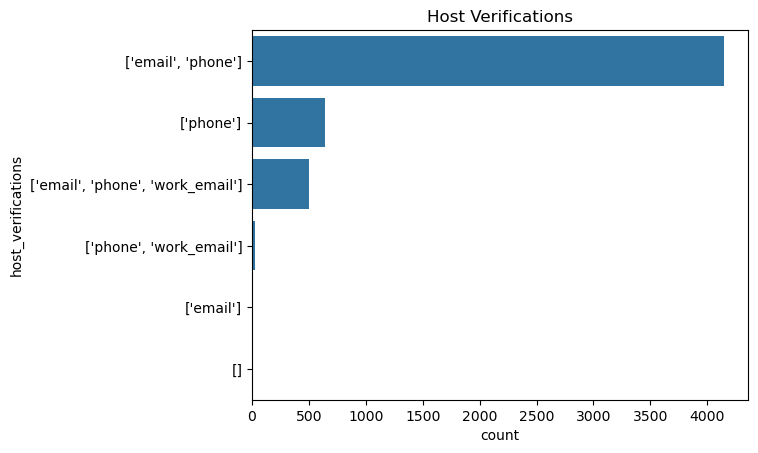

In [37]:
sns.countplot(y='host_verifications', data=df, order=df['host_verifications'].value_counts().index)
plt.title("Host Verifications")

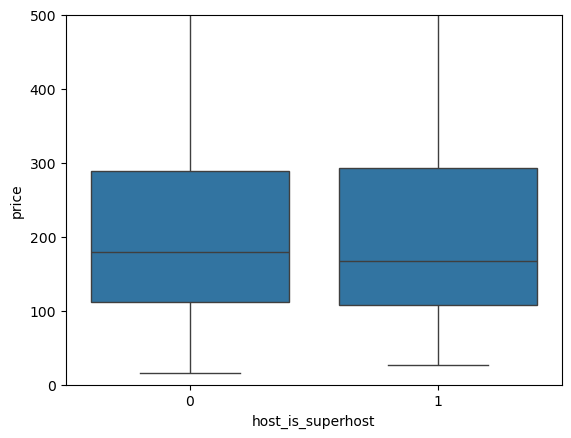

In [38]:
sns.boxplot(data = df, x = 'host_is_superhost', y = 'price', orient = 'v')
plt.ylim(0, 500)
plt.show()

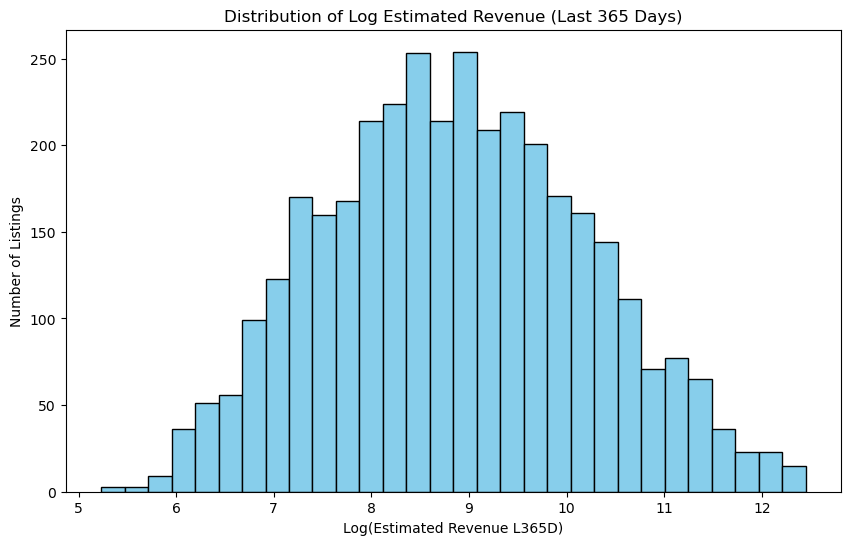

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(
    np.log1p(df.loc[df["estimated_revenue_l365d"] > 0, "estimated_revenue_l365d"]),
    bins=30,
    color="skyblue",
    edgecolor="black"
)
plt.title("Distribution of Log Estimated Revenue (Last 365 Days)")
plt.xlabel("Log(Estimated Revenue L365D)")
plt.ylabel("Number of Listings")
plt.show()


In [40]:
df.columns = (
    df.columns
      .str.replace(" ", "_")
      .str.replace("or_more", "plus")
)
df.to_csv("munich_cleaned.csv", index=False)
